In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc

In [171]:
B = 0.05 #T
f = 1000 #Hz
omega = 3.5 #rad/seg
d = 25 #cm
ciclo = 1/f #seg
R = 1750 #Ohmios
flujo = lambda t: np.pi*(R**2)*B*np.cos(omega*t)*np.cos(2*np.pi*f*t)

tiempo = np.linspace(0.,ciclo,1000)
#voy a usar el ciclo como el tiempo que queremos graficar ya que despues se debería repetir la funcion

In [172]:
def Derivative(f,x,h=10**-6):
    return (f(x+h)-f(x-h))/(2*h)

In [173]:
def calcular_corriente(R,flujo,tiempo, Derivative):
    corriente = list()
    for i in range(len(tiempo)):
        derivada = Derivative(flujo,tiempo[i])
        I = (-1/R)*derivada
        corriente.append(I)
    return corriente

corriente = calcular_corriente(R, flujo, tiempo, Derivative)

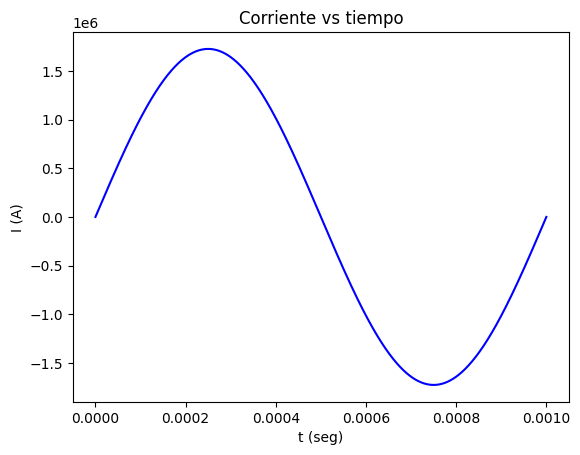

In [174]:
#CHEQUEAR UNIDADES
plt.plot(tiempo,corriente,color='b')
#plt.scatter(tiempo, Roots, color='r')
plt.xlabel('t (seg)')
plt.ylabel('I (A)')
plt.title('Corriente vs tiempo')
plt.show()

In [175]:
def current(t):
    return (-1/R)*Derivative(flujo, t)

In [176]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    error = 1.
    it = 0
    while error > precision and it < itmax: 
        try: 
            xn1 = xn - f(xn)/df(f,xn)
            error = np.abs(f(xn)/df(f,xn))  
        except ZeroDivisionError:
            print('Division por cero')    
        xn = xn1
        it += 1
    if it == itmax:
        return False
    else:
        return xn

In [177]:
def GetAllRoots(x, tolerancia=10):
    Roots = np.array([])
    for i in x:
        root = GetNewtonMethod(current,Derivative,i)
        if root != False:
            croot = np.round(root, tolerancia)
            if croot not in Roots:
                Roots = np.append(Roots,croot)
    Roots.sort()
    return Roots

In [181]:
raices = GetAllRoots(tiempo)
Racines = np.array([])
for i in range(len(raices)):
    if raices[i]<=ciclo and raices[i]>=0:
        Racines = np.append(Racines, raices[i])
Racines

array([0.    , 0.0005, 0.001 ])

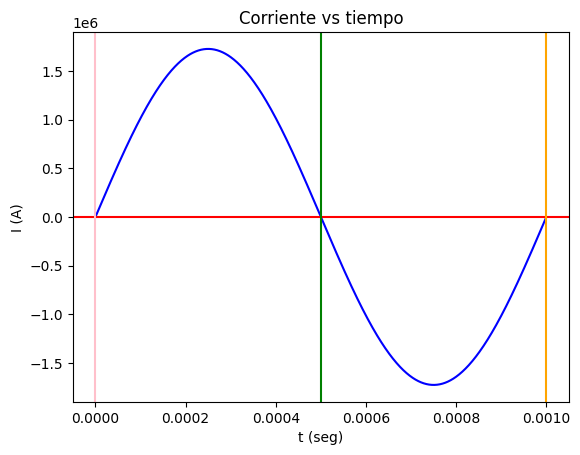

In [182]:
#CHEQUEAR UNIDADES
plt.plot(tiempo,corriente,color='b')
#plt.scatter(tiempo, Roots, color='r')
plt.axhline(y = 0, color = 'r')
plt.axvline(x = 0., color = 'pink')
plt.axvline(x = 0.0005, color = 'g')
plt.axvline(x = 0.001, color = 'orange')
plt.xlabel('t (seg)')
plt.ylabel('I (A)')
plt.title('Corriente vs tiempo')
plt.show()